In [1]:
import json
import numpy as np
import tensorflow as tf
from IPython.display import Image

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Let's set up the hyperparameters

In [38]:
vocab_size=5000
embedding_dim=32
max_length=100
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'
training_size=20000

#### Let's open the JSON file. The data source is mentioned in Week 1 Jupyter notebook

In [39]:
with open('Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for i in datastore:
    sentences.append(i['headline'])
    labels.append(i['is_sarcastic'])

#### Let's split the dataset into training and testing data

In [40]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#### Tokenizing, Sequencing, and Padding the Data

In [41]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

#### To Numpy

In [42]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

#### Let's build the neural network

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 160,817
Trainable params: 160,817
Non-trainable params: 0
_________________________________________________________________


#### Fit the model

In [44]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 1s - loss: 0.6702 - accuracy: 0.5591 - val_loss: 0.6087 - val_accuracy: 0.6898
Epoch 2/20
625/625 - 1s - loss: 0.4836 - accuracy: 0.7879 - val_loss: 0.3944 - val_accuracy: 0.8356
Epoch 3/20
625/625 - 1s - loss: 0.3285 - accuracy: 0.8662 - val_loss: 0.3728 - val_accuracy: 0.8356
Epoch 4/20
625/625 - 1s - loss: 0.2831 - accuracy: 0.8841 - val_loss: 0.3566 - val_accuracy: 0.8469
Epoch 5/20
625/625 - 1s - loss: 0.2566 - accuracy: 0.8954 - val_loss: 0.3565 - val_accuracy: 0.8477
Epoch 6/20
625/625 - 1s - loss: 0.2365 - accuracy: 0.9041 - val_loss: 0.3670 - val_accuracy: 0.8453
Epoch 7/20
625/625 - 1s - loss: 0.2230 - accuracy: 0.9111 - val_loss: 0.3740 - val_accuracy: 0.8442
Epoch 8/20
625/625 - 1s - loss: 0.2121 - accuracy: 0.9141 - val_loss: 0.3860 - val_accuracy: 0.8453
Epoch 9/20
625/625 - 1s - loss: 0.2022 - accuracy: 0.9167 - val_loss: 0.3995 - val_accuracy: 0.8435
Epoch 10/20
625/625 - 1s - loss: 0.1947 - accuracy: 0.9223 - val_loss: 0.4148 - val_accuracy: 0.8398

#### Let's Plot Accuracy and Loss while changing the hyperparameters

In [48]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
#plot_graphs(history, "accuracy")
#plot_graphs(history, "loss")

Vocabulary size = 5000 
Embedding Dimensions = 16 
Max Length = 100


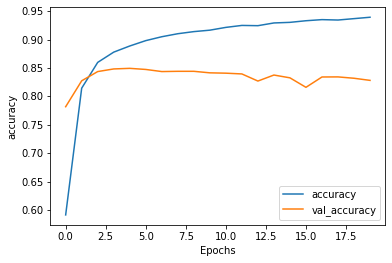

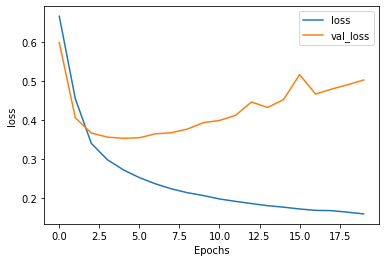

In [35]:
print("Vocabulary size = {} \nEmbedding Dimensions = {} \nMax Length = {}".format(5000, 16, 100))
listOfImageNames = ['Data/fig1.png',
                    'Data/fig2.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Vocabulary size = 10000 
Embedding Dimensions = 16 
Max Length = 100


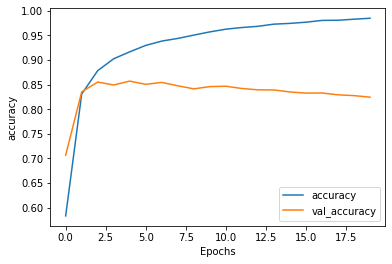

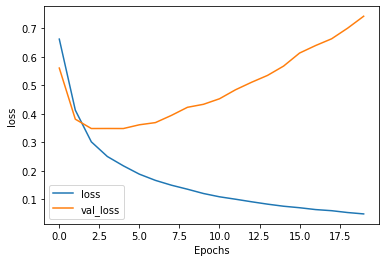

In [37]:
print("Vocabulary size = {} \nEmbedding Dimensions = {} \nMax Length = {}".format(10000, 16, 100))
listOfImageNames = ['Data/fig3.png',
                    'Data/fig4.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Vocabulary size = 5000 
Embedding Dimensions = 32 
Max Length = 100


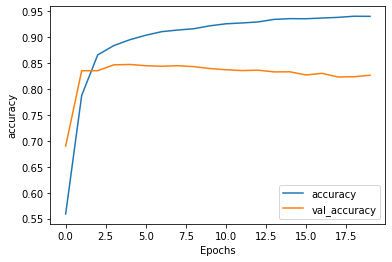

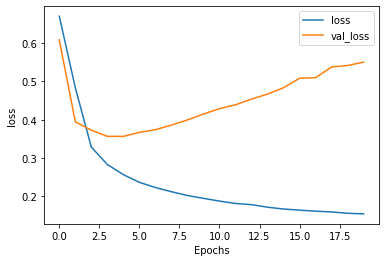

In [47]:
print("Vocabulary size = {} \nEmbedding Dimensions = {} \nMax Length = {}".format(5000, 32, 100))
listOfImageNames = ['Data/fig5.png',
                    'Data/fig6.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))